# Machine Learning Foundation

## Course 3, Part a: Logistic Regression LAB


## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01) database, which was built from the recordings of study participants who carried a smartphone with an embedded inertial sensor while performing activities of daily living (ADL). The objective is to classify the activities the participants performed into one of the six following categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying.

The following information is provided for each record in the dataset:

*   Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration
*   Triaxial Angular velocity from the gyroscope
*   A 561-feature vector with time and frequency domain variables
*   The activity label

More information about the features are available on the website linked above.


In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
import seaborn as sns, pandas as pd, numpy as np

## Question 1

Import the data and do the following:

*   Examine the data types--there are many columns, so it might be wise to use value counts.
*   Determine if the floating point values need to be scaled.
*   Determine the breakdown of each activity.
*   Encode the activity label as an integer.


The data columns are all floats except for the activity label.


In [53]:
### BEGIN SOLUTION
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

In [55]:
data.columns


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                  int64
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).


In [83]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
Name: count, dtype: int64

In [ ]:
data.iloc[:, :-1].max().value_counts()

Examine the breakdown of activities; they are relatively balanced.


In [56]:
data.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.\
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.


In [104]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

### END SOLUTION

array([2, 2, 2, ..., 5, 5, 5])

## Question 2

*   Calculate the correlations between the dependent variables.
*   Create a histogram of the correlation values.
*   Identify those that are most correlated (either positively or negatively).


In [85]:
# ### BEGIN SOLUTION
feature_cols = data.columns[:-1]
# corr_values = data[feature_cols].corr()

# # Gets the indices of the lower triangle of the correlation matrix, including the diagonal.

# tril_index = np.tril_indices_from(corr_values)
# # The following loop sets the lower triangular values (including the diagonal) to NaN to avoid duplication:
# for coord in zip(*tril_index):
#     corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# # Convert Correlation Matrix to DataFrame:

# # The .stack() method converts the wide-form correlation matrix to a long-form, multi-indexed Series.
# # .to_frame().reset_index() converts the stacked Series into a DataFrame and resets the index.
# # .rename(columns={'level_0':'feature1', 'level_1':'feature2', 0:'correlation'}) renames the columns appropriately.
# corr_values = (corr_values
#                .stack()
#                .to_frame()
#                .reset_index()
#                .rename(columns={'level_0':'feature1',
#                                 'level_1':'feature2',
#                                 0:'correlation'}))

# # Adds a new column for the absolute correlation values to facilitate sorting.
# corr_values['abs_correlation'] = corr_values.correlation.abs()

A histogram of the absolute value correlations.


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[Text(0.5, 0, 'Absolute Correlation'), Text(0, 0.5, 'Frequency')]

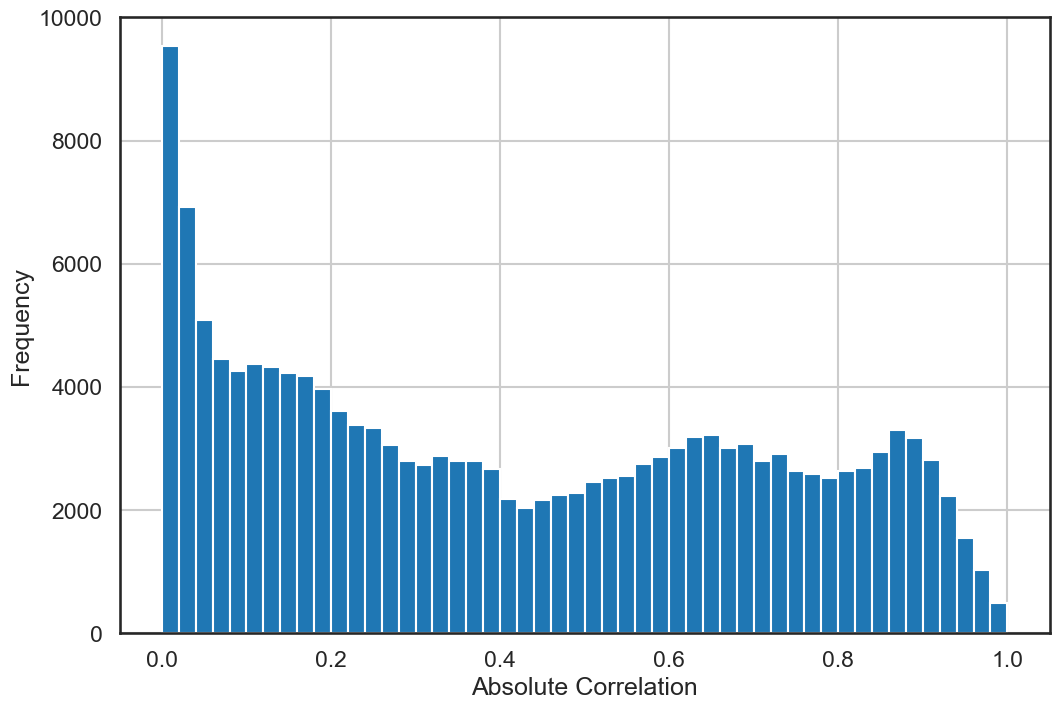

In [12]:
# sns.set_context('talk')
# sns.set_style('white')

# ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
# ax.set(xlabel='Absolute Correlation', ylabel='Frequency')


In [13]:
# # The most highly correlated values
# corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
# ### END SOLUTION

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


## Question 3

*   Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
*   Regardless of the method used to split the data, compare the ratio of classes in both the train and test splits.


In [69]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# instantiates the stratified shuffle split
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)
# perform the actual split
# the split func takes two aargs: the  features and the target var
# next(...): Retrieves the first (and only) split. The split method returns a generator, so next is used to get the indices of the train and test splits.
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [89]:
# y_train.value_counts(normalize=True)
# data.sample(20)
y_train

1575    3
1707    3
6425    4
264     3
5972    0
       ..
414     0
4138    4
3037    5
3002    4
996     2
Name: Activity, Length: 7209, dtype: int64

In [61]:
y_test.value_counts(normalize=True)
### END SOLUTION

Activity
LAYING                0.188673
STANDING              0.185113
SITTING               0.172492
WALKING               0.167314
WALKING_UPSTAIRS      0.149838
WALKING_DOWNSTAIRS    0.136570
Name: proportion, dtype: float64

## Question 4

*   Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
*   Using cross validation to determine the hyperparameters and fit models using L1 and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.


In [103]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y=pd.Series(lr.predict(X_test))
y.tail(10)
r2_score(y,y_test)#0.99
index_to_activity=['LAYING','STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS']


0.993807145886808

In [19]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
# C is the inverse of the regularization strength (
# A smaller 𝐶 value means stronger regularization (more penalty on the magnitude of coefficients).
# A larger C value means weaker regularization (less penalty on the magnitude of coefficients).
#  Here, Cs is set to 10, which means that 10 different values of will be tried during cross-validation.
# you can also provide specific values for C by passing an array:

# Cs_values = [0.01, 0.1, 1, 10, 100]
# lr_l1 = LogisticRegressionCV(Cs=Cs_values, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
# # This sets the number of folds in cross-validation. The dataset will be split into 4 parts, and the model will be trained and validated 4 times, each time using a different part of the data as the validation set and the remaining parts as the training set.
# penalty='l1': This specifies that L1 regularization should be used. L1 regularization adds a penalty equal to the absolute value of the coefficients' magnitudes.
# solver='liblinear': The solver to use for the optimization problem. liblinear is a good choice for smaller datasets and when L1 regularization is used, as it supports this type of regularization.
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [22]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

KeyboardInterrupt: 

## Question 5

*   Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately.


In [90]:
### BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients = list()
coeff_labels = ['lr','lr_l1']
coeff_models = [lr,lr_l1]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                      lr_l1  \
            0         1         2         3         4         5        0   
382 -0.019329  0.122878  0.113297  0.736545 -0.748903  0.549888 -0.00336   
4   -0.045407 -0.034155 -0.451850  0.260278 -0.517123  0.106248  0.00000   
237  0.106739  0.215388 -0.092231  0.296640 -0.079749 -0.214612  0.00000   
529  0.011535  0.276308 -0.054156  0.081615  0.004573 -0.084161  0.00000   
424 -0.020132 -0.206358  0.004468 -0.018536 -0.051027 -0.321003  0.00000   
343  0.001937  0.224749  0.239631  0.054796  0.061345  0.209171  0.00000   
244 -0.001301  0.111786 -0.765764 -0.289886  0.250773  0.345581  0.00000   
353 -0.054494 -0.184109 -0.196497  0.411171 -0.383474 -0.403913  0.00000   
341  0.018369  0.259945  0.154857 -0.092916  0.106940  0.288517  0.00000   
495  0.008565  0.217952  0.309497  0.123141  0.198037  0.059359  0.00000   

                                                       
            1         2         3         4         5  
382  0.000000  0.000000  0.687347 -0.595410  0.493344  
4    0.000000 -1.602370  0.822260 -1.385650 -0.037292  
237  0.000000  0.068807  0.008487 -0.035569 -0.530911  
529  0.000000  0.000000  0.458366  0.112562 -0.513636  
424  0.000000  0.000000 -0.290747  0.000000 -0.330216  
343  0.325014  0.197199  0.118656  0.102591  0.223400  
244  0.000000 -2.464260 -0.781978  0.732147  0.675288  
353  0.000000  0.000000  0.783461 -0.569546 -1.221307  
341  0.000000  0.000000  0.026213  0.099401  0.315636  
495  0.229449  0.865419  0.012545  0.203261  0.329517

Prepare six separate plots for each of the multi-class coefficients.


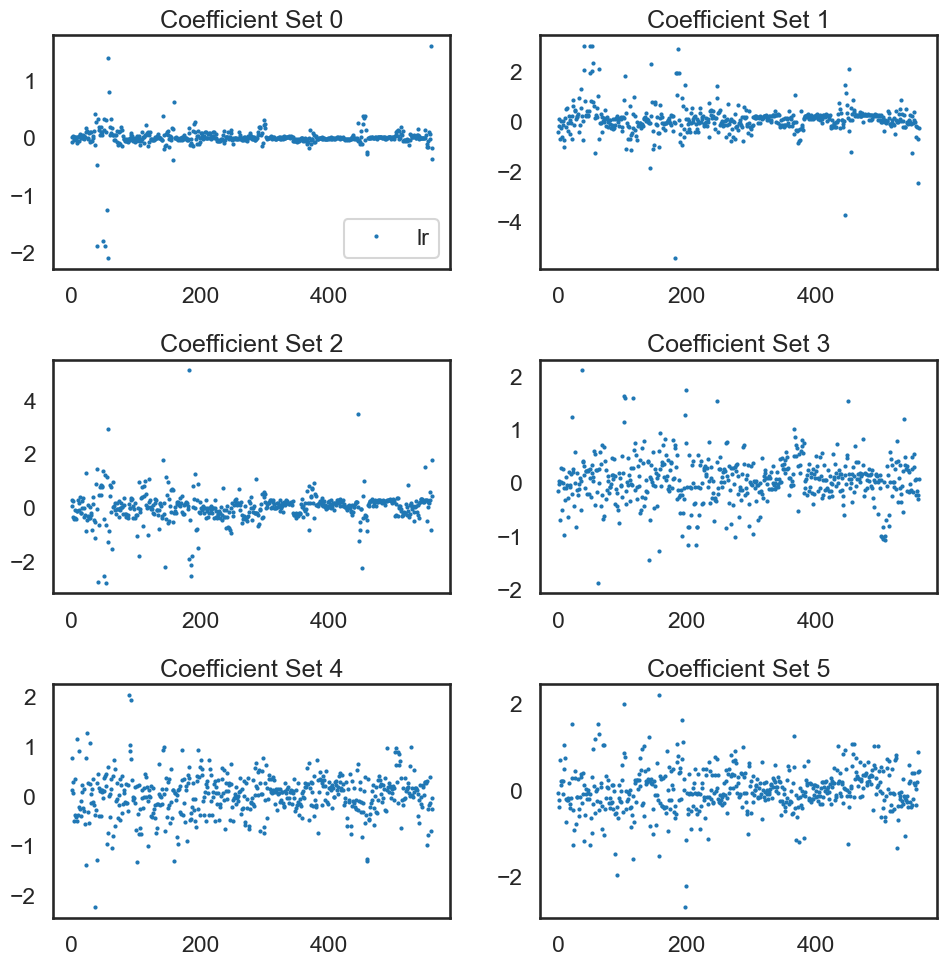

In [24]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
### END SOLUTION

## Question 6

*   Predict and store the class for each model.
*   Store the probability for the predicted class for each model.


In [94]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr','lr_l1']
coeff_models = [lr,lr_l1]

for lab,mod in zip(coeff_labels, coeff_models):
    
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)


0                WALKING
1       WALKING_UPSTAIRS
2                WALKING
3                SITTING
4                 LAYING
              ...       
3085            STANDING
3086             WALKING
3087             SITTING
3088             SITTING
3089    WALKING_UPSTAIRS
Length: 3090, dtype: object

In [27]:

### END SOLUTION

,lr
0,0.998939
1,0.988125
2,0.987576
3,0.981381
4,0.998277


## Question 7

For each model, calculate the following error metrics:

*   Accuracy
*   Precision
*   Recall
*   F-score
*   Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.


In [28]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [98]:
# metrics
### END SOLUTIO


0             WALKING
1    WALKING_UPSTAIRS
2             WALKING
3             SITTING
4              LAYING
5    WALKING_UPSTAIRS
6              LAYING
7            STANDING
8              LAYING
9              LAYING
dtype: object

7743    3
969     5
3175    3
8907    1
6368    0
2050    5
68      0
7368    2
8790    0
7569    0
Name: Activity, dtype: int64

## Question 8

*   Display or plot the confusion matrix for each model.


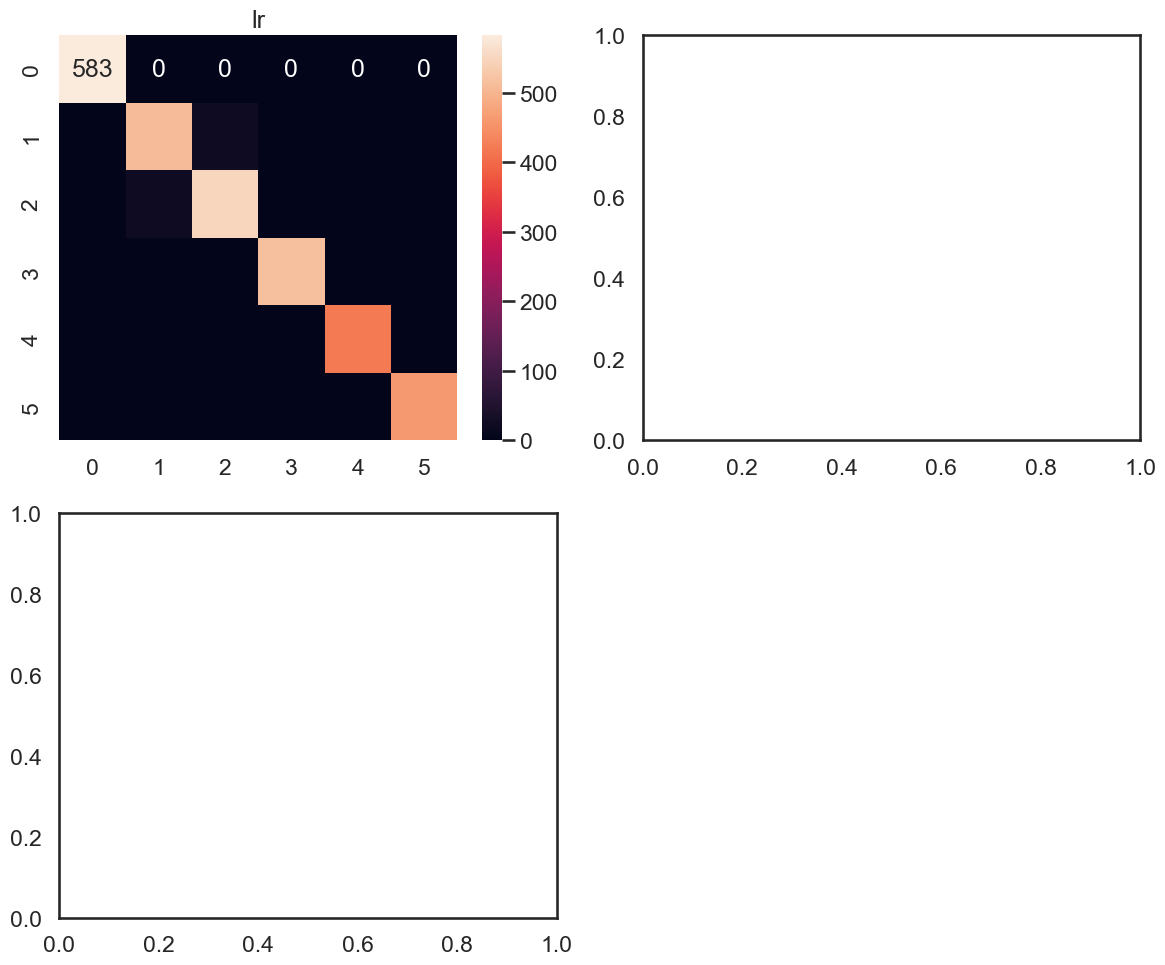

In [29]:
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()
### END SOLUTION

***

### Machine Learning Foundation (C) 2020 IBM Corporation
